In [1]:
from ClustersFeatures import *
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
pd_df=pd.DataFrame(digits.data)
pd_df['target'] = digits.target
pd_df

0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  target  
0     0.0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1     0.0  0.0  11.0  16.0  10.0  0.0  0.0       1  
2     0.0  0.0   3.0  11.0  16.0  9.0  0.0       2  
3     0.0  7.0  13.0  13.0   9.0  0.0  0.0       3  
4     0.0  0.0   2.0  16.0   4.0  0.0  0.0       4  
...   ...  ...   ...   ...   ...  ...  ...     ...  
1792  0.0  2.0  14.0  15.0   9.0  0.0  0.0       9  
1793  0.0  6.0  16.0  14.0   6.0  0.0  0.0       0  
1794  0.0  2.0   9.0  13.0   6.0  0.0  0.0       8  
1795  0.0  5.0  12.0  16.0  12.0  0.0  0.0       9  
1796  1.0  8.0  12.0  14.0  12.0  1.0  0.0       8  

[1797 rows x 65 columns]

In [16]:
CC=ClustersCharacteristics(pd_df, )



TypeError: __init__() got an unexpected keyword argument 'return_cluster_density'

In [32]:
unpacked_dict=CC.utils_Projection_2D_Density("PCA",90, return_data=True,return_clusters_density=True)

In [33]:
unpacked_dict.keys()

dict_keys(['Z-Grid', 'Clusters Density', '2D PCA Data'])

In [35]:
Zi=unpacked_dict['Z-Grid']
R=unpacked_dict['Clusters Density']

In [ ]:
np.linspace(0,10,50)

In [36]:
import plotly.graph_objects as go
from plotly.graph_objs import Layout
import plotly.express as px
clusters=CC.labels_clusters

Z=np.zeros(Zi.shape)


contours_=[]
for i,Cluster in enumerate(clusters):
    Z+=R[Cluster]
    z=np.round(1*(R[Cluster]>np.percentile(R[Cluster],99))*R[Cluster],1)
    contours_.append(go.Contour(
            x=Zi.index.values,
            y=Zi.columns.values,
            z=z,
            name=str(Cluster),
            opacity=0.70,
            contours=dict(
                type="constraint",
                start=5)
            ))
fig = go.Figure(data=contours_)   

fig.show()

In [41]:
threshold = np.mean([np.percentile(R[Cluster], 90) for Cluster in CC.labels_clusters])

In [89]:

data=unpacked_dict['2D PCA Data']

import plotly.graph_objects as go

fig = go.Figure(
    go.Contour(
        x=Zi.index.values,
        y=Zi.columns.values,
        z=Zi,
        contours_coloring='heatmap',
        colorscale = 'Blues'
    ))

centroids={}
for Cluster in CC.labels_clusters:
    centroids[Cluster]=data[CC.data_target==Cluster].mean()
    idx_max=((data[CC.data_target==Cluster] - centroids[Cluster])**2).sum(axis=1).idxmax()
    farther_element=data[data.index==idx_max]
    fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=centroids[Cluster][0], y0=centroids[Cluster][1], x1=farther_element[farther_element.columns[0]].values[0], y1=farther_element[farther_element.columns[1]].values[0])

    print(farther_element[farther_element.columns[0]].values[0])

fig.add_trace(go.Scatter(x=pd.DataFrame(centroids).loc[data.columns[0]], y=pd.DataFrame(centroids).loc[data.columns[1]],
                    marker=dict(color=np.arange(0,9)),
                    mode='markers',
                    name='Cluster centroids'))


fig.add_trace(go.Scatter(x=data[data.columns[0]].sample(frac=0.3,random_state=200), y=data[data.columns[1]].sample(frac=0.3,random_state=200),mode="markers",marker=dict(size=2.5), marker_color=CC.data_target,opacity=0.90))
fig.update_layout(showlegend=False)
fig.show()

20.092275040713062
-7.724723163663991
10.71040577813955
-13.513263438981959
-7.073422502574214
-7.81266901590464
6.592963549279753
8.836523599125249
15.114055639423944
8.34252662993326


PCA0       PCA1
774  8.342527 -11.087425


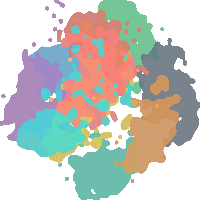

In [42]:

from PIL import Image
import plotly.express as px
discrete_colors=['#1abc9c','#2ecc71','#3498db','#9b59b6','#34495e','#f1c40f','#e67e22','#e74c3c','#ff5e57','#00d8d6','#0fbcf9','#DEA0FD','#FE00FA','#325A9B','#FEAF16','#F8A19F','#90AD1C','#F6222E','#1CFFCE','#2ED9FF','#B10DA1','#C075A6','#FC1CBF','#B00068','#FBE426','#FA0087']


hex_to_rgb_convert = lambda hex_string: [int(hex_string[1:3], 16), int(hex_string[3:5], 16), int(hex_string[5:7], 16)]
image_clusters={}
Base_image=Image.new('RGBA', R[Cluster].shape)
for i,Cluster in enumerate(CC.labels_clusters):
    image_clusters[Cluster]=np.zeros((R[Cluster].shape[0],R[Cluster].shape[1],4))
    image_clusters[Cluster][R[Cluster]>threshold] = hex_to_rgb_convert(discrete_colors[i]) + [200]
    
    Cluster_image=Image.fromarray(np.uint8(image_clusters[Cluster]))
    red, g, b, alpha = Cluster_image.split()
    alpha = alpha.point(lambda i: i>0 and 204)
    Base_image=Image.composite(Cluster_image, Base_image, alpha)

px.imshow(Base_image)


In [ ]:
Image

In [ ]:
imageqsdqsd

In [ ]:
df=pd.concat([data,CC.data_target],axis=1)
test=ClustersCharacteristics(df,"target")

In [ ]:
test.projection_2D("PCA0","PCA1")

In [ ]:
qsd

In [ ]:
CC.graph_density_projection_2D("surface", "PCA", "robust")

In [ ]:
qdqsd

In [ ]:
gggg

In [ ]:
CC.graph_()

In [ ]:
yyy

In [ ]:
from sklearn.neighbors import KernelDensity

data_PCA=CC2.utils_PCA(2)
xmin = data_PCA['PCA0'].min() 
xmax = data_PCA['PCA0'].max()
ymin = data_PCA['PCA1'].min()
ymax = data_PCA['PCA1'].max()

# x coordinates of the grid cells
xgrid = np.arange(xmin, xmax, (xmax-xmin)/100)
# y coordinates of the grid cells
ygrid = np.arange(ymin, ymax, (ymax-ymin)/100)
X,Y=np.meshgrid(xgrid, ygrid[::-1])

xy = np.vstack([Y.ravel(), X.ravel()]).T

In [ ]:

kde = KernelDensity(bandwidth=0.04, kernel='gaussian')
kde.fit(data_PCA)

In [ ]:
result=pd.DataFrame(kde.score_samples(xy).reshape(X.shape))

In [ ]:
result=pd.DataFrame(kde.score_samples(xy).reshape(X.shape))
result=(result-result.mean().mean())/result.std().std()
result

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=result.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Contour(
        x=xgrid,
        y=ygrid,
        z=result,
        colorscale='RdBu')])
fig.show()

In [ ]:
CC2.graph_PCA_2D()

In [ ]:
result


In [ ]:
print(x)

In [ ]:
--

In [7]:
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
X, y = make_blobs(n_samples=200, centers=2, n_features=3,cluster_std=0.5)
X=StandardScaler().fit_transform(X)
T=pd.DataFrame(data=X)
T['target']=y
CC2=ClustersCharacteristics(T,"target")

In [9]:
r=CC2.utils_PCA(2)


In [10]:
import plotly.graph_objects as go
fig = go.Figure(go.Histogram2dContour(
        x = r[r.columns[0]],
        y = r[r.columns[1]],
        colorscale = 'Blues'
))


fig.add_trace(go.Scatter(
        x = r[r.columns[0]],
        y = r[r.columns[1]],
        xaxis = 'x',
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = '#549ecd',
            size = 3
        )
    ))
fig.add_trace(go.Histogram(
        y = r[r.columns[1]],
        xaxis = 'x2',
        marker = dict(
            color = '#549ecd'
        )
    ))
fig.add_trace(go.Histogram(
        x = r[r.columns[0]],
        yaxis = 'y2',
        marker = dict(
        color = '#549ecd'
        )
    ))
fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1],
        showgrid = False
    ),
    height = 600,
    width = 900,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)
fig.show()

In [ ]:
reduction_method="PCA"
if reduction_method == "UMAP":
    data=CC.utils_UMAP()
elif reduction_method == "PCA":
    data=CC.utils_PCA(2)

xmin, xmax = data[data.columns[0]].min(), data[data.columns[0]].max()
ymin, ymax = data[data.columns[1]].min(), data[data.columns[1]].max()

X,Y = np.meshgrid(np.arange(xmin,xmax, (xmax-xmin)/100 ),np.arange(ymin,ymax,(ymax-ymin)/100))
std=1
gaussian_distrib = np.vectorize(lambda grid_coord,point_coord : np.exp(-1*np.sum((np.array(grid_coord)-np.array(point_coord))**2/(2*std)))/(2*np.pi*std**2))

In [ ]:
grid_coord_all=np.transpose([np.arange(xmin,xmax, (xmax-xmin)/100 ),np.arange(ymin,ymax,(ymax-ymin)/100)])


In [ ]:
np.sum((np.array([[1,0],[2,0]])-np.array([[0,0],[0,0]]))**2)

In [ ]:
gaussian_distrib(grid_coord_all,[0,0])

In [ ]:
CC2.graph_density_projection_2D("contour", "PCA","robust")

In [ ]:
CC2.data_interelement_distance_for_clusters(clusters=[1])

In [ ]:
CC2.data_interelement_distance_for_clusters(clusters=[1,2])

In [ ]:
CC2.clusters_info

In [ ]:
CC2.general_info()

In [ ]:
CC2.confusion_hypersphere_matrix(radius=0.15, counting_type='including')

In [ ]:
CC2.data_intercentroid_distance_matrix()

In [ ]:
CC2.data_centroids

### Speed test of different scores

In [ ]:
print('score_index_ball_hall \n')
%timeit CC.score_index_ball_hall()
print('\nscore_index_banfeld_Raftery\n')
%timeit CC.score_index_banfeld_Raftery()
print('\nscore_index_c\n')
%timeit CC.score_index_c()
print('\nscore_index_c_for_each_cluster\n')
%timeit CC.score_index_c_for_each_cluster(0)
print('\nscore_index_calinski_harabasz \n')
%timeit CC.score_index_calinski_harabasz()
print('\nscore_index_davies_bouldin \n')
%timeit CC.score_index_davies_bouldin()
print('\nscore_index_davies_bouldin_for_each_cluster \n')
%timeit CC.score_index_davies_bouldin_for_each_cluster()
print('\nscore_index_det_ratio \n')
%timeit CC.score_index_det_ratio()
print('\nscore_index_dunn\n')
%timeit CC.score_index_dunn()
print('\nscore_index_generalized_dunn_matrix\n')
%timeit CC.score_index_generalized_dunn_matrix()
print('\nscore_index_Log_Det_ratio\n')
%timeit CC.score_index_Log_Det_ratio()
print('\nscore_index_log_ss_ratio \n')
%timeit CC.score_index_log_ss_ratio()
print('\nscore_index_mclain_rao \n')
%timeit CC.score_index_mclain_rao()
print('\nscore_index_PBM \n')
%timeit CC.score_index_PBM()
print('\nscore_index_point_biserial\n')
%timeit CC.score_index_point_biserial()
print('\nscore_index_ratkowsky_lance \n')
%timeit CC.score_index_ratkowsky_lance()
print('\nscore_index_ray_turi \n')
%timeit CC.score_index_ray_turi()
print('\nscore_index_S_Dbw \n')
%timeit CC.score_index_S_Dbw()
print('\nscore_index_scott_symons\n')
%timeit CC.score_index_scott_symons()
print('\nscore_index_SD \n')
%timeit CC.score_index_SD()
print('\nscore_index_trace_WiB \n')
%timeit CC.score_index_trace_WiB()
print('\nscore_index_wemmert_gancarski \n')
%timeit CC.score_index_wemmert_gancarski()
print('\nscore_index_xie_beni\n')
%timeit CC.score_index_xie_beni()

In [ ]:
bc_list = np.arange(1, 7)
wc_list = np.arange(1, 4)

df = pd.DataFrame(columns=wc_list, index=bc_list)
for bc in bc_list:
    for wc in wc_list:
        print(wc,bc)
        %timeit CC.score_index_generalized_dunn(within_cluster_distance=wc, between_cluster_distance=bc)
        df.loc[bc, wc] = CC.score_index_generalized_dunn(within_cluster_distance=wc, between_cluster_distance=bc)
        
df.index.name = "Generalized Dunn Indexes"
df